# Worked 1 - Andrew Koren

Last time I tried to solve for the EOMs of a rollercoaster on a particular curve, then I realized how painful it would be and decided to start over. We're going to analyze a simple, fun system which doesn't cause any headaches.

Note: In section 2 I describe this as a 2D system with both a horizontal and vertical kinetic energy. This falls through due to my assumption about the box sliding smoothly/magically down the ramp. See explenation in section 3.

Overview: 

We first introduce our system, a box stuck in a divot, and then derive the our lagrangian for the situation. Based on this, we're able to get our EOMs from the euler-larange equation. Thanks to the choice of system, we're able to relate our 2D position and velocity to a 1D system and make a simple python function to plot position and velocity for various initial conditions. Finally, we summarize what our results show, including a short discussion on numerical integrators.

1. Mechanical System to Study

Our system will be a box which slides down a ramp for length $L$, then slides on a flat surface to $2L$, where it slides up another ramp

We will develop the lagrangain $\mathcal{L}$ of this system, which has different potentials for $x<L$ and $x>2L$, while a box of mass $m_1$ slides down. 

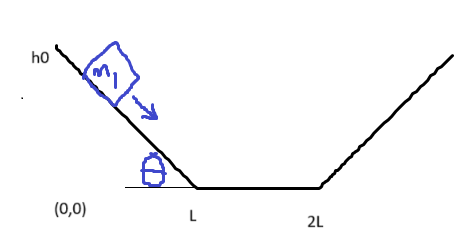

The rest of the worked problem will have the following format:
Part 2 will develop the Lagrangian by analyzing the Kinetic and Potential Energy of the system,
and the assumptions will be explained.
Part 3 will solve the Lagrangian using the Euler-Lagrangian Equation to find the equations of
motion.
Part 4 will numerically solve the Lagrangian in the Jupyter Notebook attached.

<!-- Part 5 will relax the assumptions made in Part 2, and we will compare the system with and
without the assumptions to determine the frequency of oscillations and stable points.
Credits will be given due to the re-using of code from in class activities.
Sawford_WorkedProblem1 -->


2. Developing the Lagrangian and Assumptions/Simplifications:

We have two major assumptions: our box slides smoothly down the ramp, and there is no angular momentum. This simplifies the system since this project isn't supposed to be anything crazy. For a rolling sphere angular momentum is much more important, but not for the box. 

Another important consideration is friction. The lagrangian we've discussed thus far is $\mathcal{L} = T - U$ which has no way to encorperate generalized forces like $F = -c\vec v$ (air resistance) or $-\mu N \hat v$ (friction dependant on normal force). These come into play with a generalized force term $Q_i$

$$
\frac{d}{dt} \frac{\partial \mathcal{L}}{\partial \dot q_i} - \frac{\partial \mathcal{L}}{\partial q_i}  = Q_i
$$

We haven't discussed this in class yet, so for now I'll simply assume zero friction. Now our perfect box is slipping on extra-flat ice.

From this we can derive our Lagrangian
 
$$
\mathcal{L} = T - U \\
T = \frac{1}{2} m \left(\dot x^2 + \dot y^2 \right) \\
U = mgh = mgy
$$

As a result of the smooth sliding condition, we can make $y$ and $\dot y$ entirely dependent on $x$
$$
y = \begin{cases}
(L-x)\tan\theta & x < L \\
0 & L \leq x \leq 2L \\
(x-2L)\tan\theta & x > 2L
\end{cases}
$$

Which also gives us $\dot y$ in terms of $\dot x$
$$
\dot y = \begin{cases}
-\dot x\tan\theta & x < L \\
0 & L \leq x \leq 2L \\
\dot x\tan\theta & x > 2L
\end{cases}
$$

This gives our 3-part lagrangian

$$
\mathcal{L} = \begin{cases}
\frac{1}{2}m\dot x^2\left(1 + \tan^2\theta \right) - mg(L-x)\tan\theta & x < L \\
\frac{1}{2}m\dot x^2 & L \leq x \leq 2L \\
\frac{1}{2}m\dot x^2\left(1 + \tan^2\theta \right) - mg(x-2L)\tan\theta & x > 2L
\end{cases}
$$

3. EOMs

We'll use the euler-lagrange equation for this one

$$
\frac{d}{dt} \frac{\partial \mathcal{L}}{\partial \dot x} - \frac{\partial \mathcal{L}}{\partial x} = 0 \\

\frac{\partial \mathcal{L}}{\partial x} = 
\begin{cases}
mg \tan \theta  & x < L\\
0  & L \leq x \leq 2L \\
-mg \tan \theta & x > 2L
\end{cases} \\

\frac{d}{dt}\frac{\partial \mathcal{L}}{\partial \dot x} = 
\begin{cases}
m \ddot x (1 + \tan^2 \theta)  & x < L\\
m \ddot x & L \leq x \leq 2L \\
m \ddot x (1 + \tan^2 \theta)  & x > 2L
\end{cases} \\

$$

This gives us our EOMs for each domain

$$
\begin{matrix}
m \ddot x (1 + \tan^2 \theta) = mg \tan \theta  & x < L\\
m \ddot x  = 0& L \leq x \leq 2L\\
m \ddot x (1 + \tan^2 \theta) = -mg \tan \theta   & x > 2L
\end{matrix} \\
$$

$$
\begin{matrix}
\ddot x = \frac{g \tan \theta}{1 + \tan^2 \theta} 
= \frac{1}{2}g \sin (2\theta)  & x < L\\
\ddot x = 0& L \leq x \leq 2L\\
\ddot x = -\frac{g \tan \theta}{1 + \tan^2 \theta} 
= -\frac{1}{2} g \sin (2\theta)  & x > 2L
\end{matrix} \\

$$


Can this be solved analytically? Kind of. The movement of a block down a ramp is taught in virtually all introductory physics classes, and the integral is quite simple. However, the acceleration function is discontinuous, resulting in the velocity and position functions being non-differentiable at $L$ and $2L$. One option is to integrate each equation of motion to get $x(t)$, and switch between functions at $L$ and $2L$. Using this method one can find the position after a certain time $t$, but there isn't an exact form for this equation, it would have to be a step function of increasing complexity, or perhaps a fourier series, which we haven't covered in class yet.

Wait, one more thing. Conservation of energy. In order to match a 2D system, we need it to also have conservation of energy. Let's evaluate our boundary condition $L$ to see if energy is conserved above and below $L$. 

$$
E(x<L) = \frac{1}{2}m(\dot x^2 + \dot y^2) + mgh \\
\text{near L: } = \frac{1}{2}m(\dot x^2 + \dot y^2) \\
E(x>L) = \frac{1}{2}m\dot x^2
$$

Notice a problem? $\dot y$ disappears. Due to our assumption that the block snaps to the ramp, our kinetic energy causes us a problem. The best way to circumvent this issue would be to convert to a 1D potential, which isn't quite as fun. I don't want to spend more time trying to develope a whole new system, so we'll have to give up on our premise. Our Lagrangian loses it's vertical component

$$
\mathcal{L}(x<L, \dot x) = \frac{1}{2}m\dot x^2 - mg(L-x)\tan \theta \\
\mathcal{L}(x>2L, \dot x) = \frac{1}{2}m\dot x^2 - mg(x-2L)\tan \theta \\
$$

And our EOM is a bit simpler

$$
\begin{matrix}
\ddot x = g \tan \theta & x<L \\
\ddot x = -g \tan \theta & x>L
\end{matrix}
$$

Part 4: Numerically solved equations.

In [29]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import sin, tan, pi
from scipy.integrate import solve_ivp

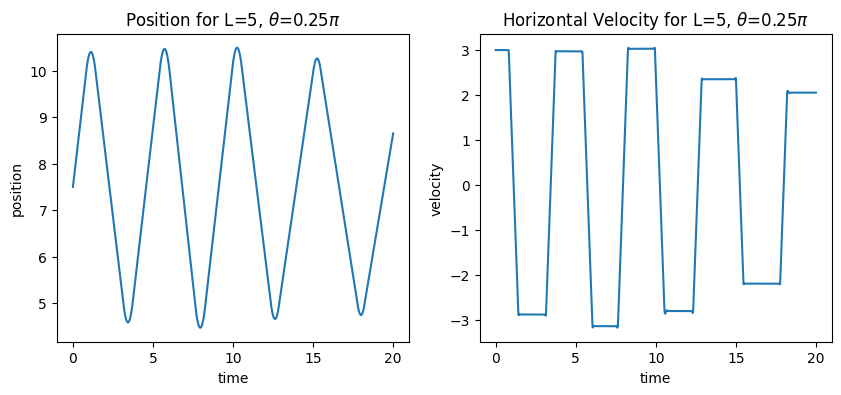

In [30]:
def ramp_EOM(t, p0, theta, L, g):
    x, v = p0
    dx = v
    if x < L:
        dv = g * tan(theta)
    elif x > 2 * L:
        dv = -g * tan(theta)
    else:
        dv = 0
    
    return dx, dv


def plot_ivp(results, L, theta):
    fig, (ax0, ax1) = plt.subplots(1,2, figsize=(10,4), sharex=True)
    ax0.plot(results.t, results.y[0], label='horizontal')
    ax0.set_xlabel('time')
    ax0.set_ylabel('position')
    ax0.set_title(fr'Position for L={L}, $\theta$={theta/pi:.2f}$\pi$')

    ax1.plot(results.t, results.y[1])
    ax1.set_xlabel('time')
    ax1.set_ylabel('velocity')
    ax1.set_title(fr'Horizontal Velocity for L={L}, $\theta$={theta/pi:.2f}$\pi$')
    plt.show()

tmax = 20
dt = 0.001

theta = pi / 4
g = 9.81
L = 5

p0 = [L+L/2, 3]

t = np.arange(0, tmax, dt)
params = ((theta, L, g))

results = solve_ivp(ramp_EOM, (0,tmax), p0, args=params, t_eval=t)

plot_ivp(results, L, theta)


The result is a bit off, but isn't suprising. Runge-Kutta is able to predict the behaviour of complex curves, but not so much discontinuous ones. Despite having conservation of energy, the velocity plateaus and maximum positions end up at different locations as Runge-Kutta struggles to describe the change in velocity at discontinuities. What if we used LSODA instead?

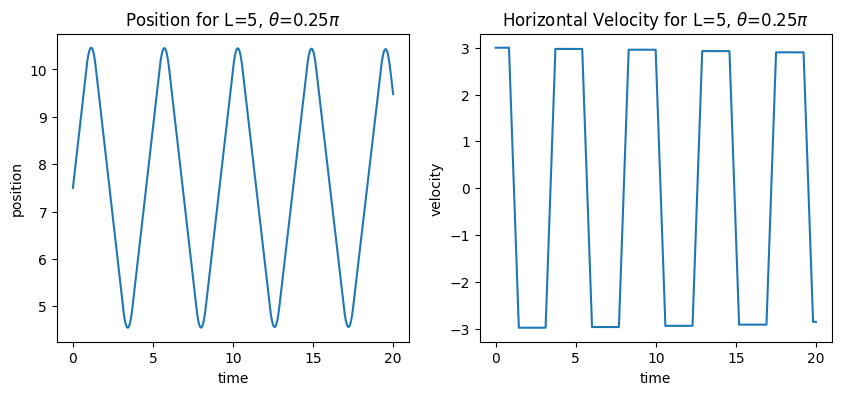

In [31]:
results = solve_ivp(ramp_EOM, (0,tmax), p0, args=params, t_eval=t, method='LSODA')

plot_ivp(results, L, theta)


This result is much better. The difference comes from the fact that our problem is stiff (has sudden/strict changes rather than smooth/continuous changes), which Runge-Kutta is not equipped to handle. LSODA can better account for stiffness.

In the above scenario, the box starts on the first ramp with a height around $4$. with a small starting kick of velocity down the ramp. 

This system is quite simple. As we will see in part 5, just about all starting positions aside from zero initial energy $E_{tot}=0$ yield the same behavior. Let's try a system with a very slight angle and very sharp angle and compare the outcomes

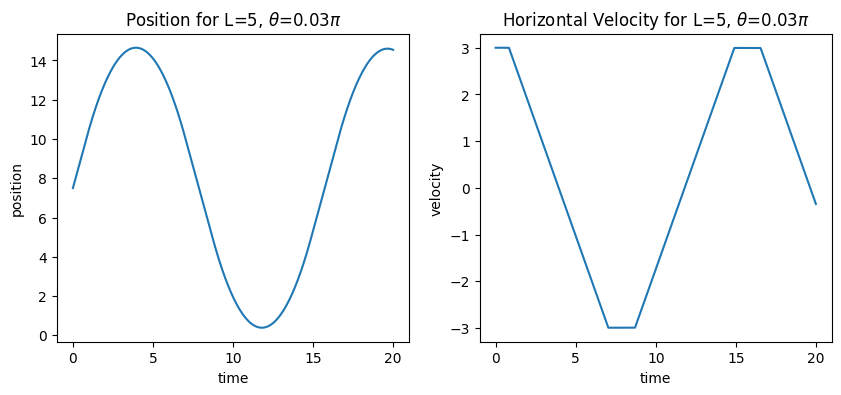

In [32]:
# Very small angle

theta = pi / 32
g = 9.81
L = 5

p0 = [3/2*L, 3]

t = np.arange(0, tmax, dt)
params = (theta, L, g)

results = solve_ivp(ramp_EOM, (0,tmax), p0, args=params, t_eval=t, method='LSODA')

plot_ivp(results, L, theta)


In this scenario, we start with the same initial velocity in the middle of the flat area. With a less steep ramp, oscillation is much longer, requiring ~17 seconds to complete one oscillation

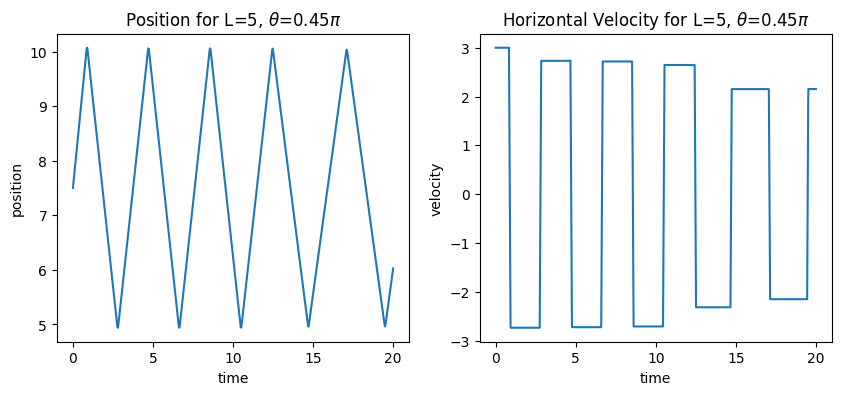

In [33]:
# Very sharp angle

theta = pi/2 * 0.9
g = 9.81
L = 5

p0 = [3/2*L, 3]

t = np.arange(0, tmax, dt)
params = (theta, L, g)

results = solve_ivp(ramp_EOM, (0,tmax), p0, args=params, t_eval=t, method='LSODA')

plot_ivp(results, L, theta)


With the same initial conditions and a steeper angle, one oscillation is only ~3 seconds. Notice how even LSODA has trouble with the steep angle, and by four periods it unnaturally loses steam. Despite being designed for a variety of situations, the near step-function shape of velocity is difficult to fit to. Perhaps the phase diagram will help explain the situation

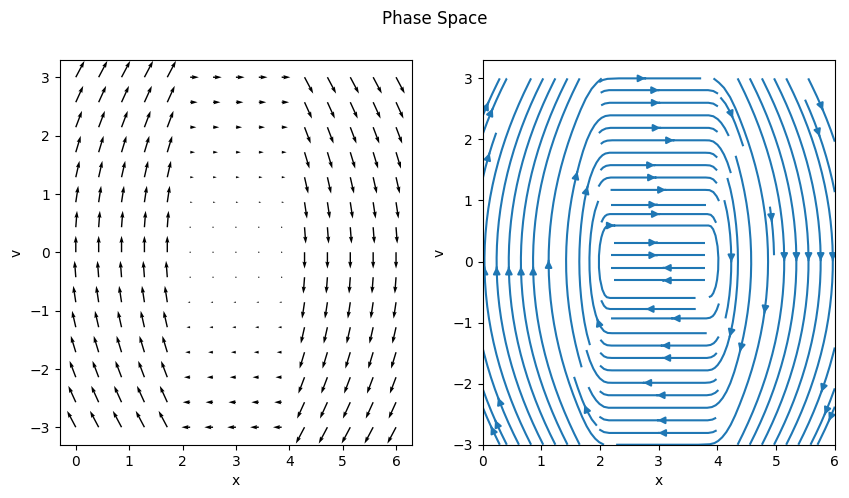

In [43]:
def get_points(X, V, params):
    dx, dv =  np.zeros(X.shape), np.zeros(V.shape)

    xlim, ylim = X.shape
    for i in range(xlim):
        for j in range(ylim):
            xloc = X[i,j]
            vloc = V[i,j]
            dx[i,j], dv[i,j] = ramp_EOM(0, (xloc, vloc), *params)
    
    return (dx, dv)

def make_phase_space(X, V, dx, dv):
    fig = plt.figure(figsize = (10,5))
    plt.subplot(1,2,1)
    plt.quiver(X,V,dx,dv)
    plt.xlabel("x")
    plt.ylabel("v")
    plt.subplot(1,2,2)
    plt.streamplot(X,V,dx,dv)
    plt.xlabel("x")
    plt.ylabel("v")
    plt.suptitle("Phase Space")
    plt.show()

x = np.linspace(0, 6, 15)
v = np.linspace(-3, 3, 15)
X, V = np.meshgrid(x, v)

theta = pi / 6
g = 9.81
L = 2


params = [theta, L, g]

dx, dv = get_points(X, V, params=params)

make_phase_space(X, V, dx, dv)

This explains what we're seeing pretty well. Velocity is constant between $L$ and $2L$, and changes direction on the ramp. The streamplot indicaties that the velocity switches sign by the time it gets back to the flat region. This makes sense, since conservation of energy suggests that returning to the same potential yields the same kinetic energy. A sharper ramp yields a quicker return to the flat region, which is steep enough to be difficult for integrators to solve.

Conclusion: 

Despite our system being dumbed-down by some pretty strict conditions, we were still able to analyze it as a physical system and find some interesting characteristics. Through observing various initial conditions and parameters we reveal it's oscillation which becomes saw-toothed at sharper angles, and square-wave velocity which are some important shapes in electronics. 

Through the phase portrait we get a pretty strong picture of what is happening for various initial conditions and see what the particle(/box) sees as it moves. 

The situation with Runge-Kutta and LSODA having trouble is itself quite interesting. Stiff solvers like LSODA are meant for problems where changes happen on vastly different time scales, requiring careful step size control, while non-stiff solvers like Runge-Kutta handle smoother changes more efficiently with constant step size. A superior algorithm might detect when the non-differentiability occurs and apply separate solvers on either side of the break, but that is beyond the scope of this project. 

A more interesting way of expanding this system would be including angular momentum or a smooth curve which accomodates a 2D system more effectively, or even building up to 3D. Using pre-existing packages could help explore such a system effectively.